Submitted by: __Dibya Ranjan Dash__    Sic: __20BECB77__  Branch: __CEN__

# Step A: Data Pre-Processing

## Step 1: Importing library

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np

## Step 2:Importing the dataset

In [12]:
data=pd.read_csv('Churn_Modelling.csv')

In [13]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
#dropping 1st 3 cols from dataset
data=data.drop(['RowNumber','CustomerId' ,'Surname'], axis=1)

In [15]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Step 3:To check if there is some missing data

In [16]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Step 4: To create Feature Matrix(X) and Dependent variable vector(Y)

In [17]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [18]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [19]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Feature matrix using OneHotEncoder

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1,2])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [21]:
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [22]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Step 6: Splitting dataset into training and testing dataset

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [25]:
xtrain

array([[-0.99850112,  1.71490137, -0.57273139, ..., -1.55337352,
         0.97725852,  0.42739449],
       [ 1.00150113, -0.58312392, -0.57273139, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.99850112,  1.71490137, -0.57273139, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 1.00150113, -0.58312392, -0.57273139, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 1.00150113, -0.58312392, -0.57273139, ...,  0.64376017,
         0.97725852,  0.01781218],
       [-0.99850112,  1.71490137, -0.57273139, ...,  0.64376017,
        -1.02327069, -1.15822478]])

In [26]:
xtest

array([[ 0.98019606, -0.56118125, -0.57812007, ...,  0.65543311,
         0.9426421 , -0.04925965],
       [ 0.98019606, -0.56118125, -0.57812007, ...,  0.65543311,
        -1.06084802, -0.58254072],
       [ 0.98019606, -0.56118125, -0.57812007, ..., -1.52570869,
         0.9426421 , -0.16313933],
       ...,
       [-1.02020406, -0.56118125,  1.72974448, ..., -1.52570869,
         0.9426421 ,  1.07759708],
       [-1.02020406,  1.78195548, -0.57812007, ...,  0.65543311,
         0.9426421 ,  1.14197101],
       [-1.02020406,  1.78195548, -0.57812007, ...,  0.65543311,
         0.9426421 , -0.88821212]])

# Step B: Build (ANN) Model 

## model with 1 hidden layer

In [27]:
d1=tf.keras.models.Sequential()

In [28]:
#first hidden layer
d1.add(tf.keras.layers.Dense(units=12,activation='relu'))
#output layer
d1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### Compile the model

In [29]:
d1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
d1.fit(xtrain, ytrain, epochs=200, validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.5298 - accuracy: 0.7746 - val_loss: 0.4698 - val_accuracy: 0.7915
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8014 - val_loss: 0.4369 - val_accuracy: 0.8015
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8090 - val_loss: 0.4231 - val_accuracy: 0.8135
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.8175 - val_loss: 0.4134 - val_accuracy: 0.8190
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4133 - accuracy: 0.8250 - val_loss: 0.4026 - val_accuracy: 0.8250
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8315 - val_loss: 0.3908 - val_accuracy: 0.8355
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3897 - accuracy: 0.8414 - val_loss: 0.3781 - val_accuracy: 0.8435

Epoch 58/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8615 - val_loss: 0.3365 - val_accuracy: 0.8620
Epoch 59/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8611 - val_loss: 0.3382 - val_accuracy: 0.8600
Epoch 60/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8625 - val_loss: 0.3375 - val_accuracy: 0.8615
Epoch 61/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8619 - val_loss: 0.3380 - val_accuracy: 0.8625
Epoch 62/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8619 - val_loss: 0.3371 - val_accuracy: 0.8590
Epoch 63/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8631 - val_loss: 0.3385 - val_accuracy: 0.8580
Epoch 64/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8614 - val_loss: 0.3377 - val_accuracy:

In [31]:
losses1=pd.DataFrame(d1.history.history)
losses1


,loss,accuracy,val_loss,val_accuracy
0,0.529785,0.774625,0.469818,0.7915
1,0.450678,0.801375,0.436856,0.8015
2,0.432887,0.809000,0.423150,0.8135
3,0.422737,0.817500,0.413382,0.8190
4,0.413295,0.825000,0.402575,0.8250
...,...,...,...,...
65,0.336439,0.861000,0.337791,0.8615
66,0.336438,0.862625,0.338044,0.8605
67,0.336349,0.861875,0.337753,0.8595
68,0.336243,0.862000,0.337764,0.8605


<AxesSubplot:>

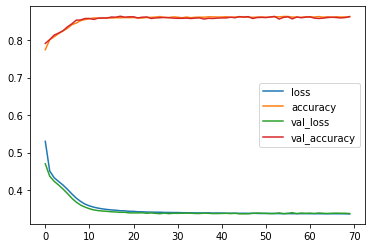

In [32]:
losses1.plot()

### Testing the model

In [33]:
yestimated=d1.predict(xtest)
yestimated=(yestimated>0.5)

63/63 [==============================] - 0s 1ms/step


In [34]:
yestimated

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

## Performance metrics 

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score
cm=confusion_matrix(ytest, yestimated) 
print('confusion matrix')
print(cm)
print('\naccuracy=', accuracy_score(ytest,yestimated))
print('precision=', precision_score(ytest,yestimated))
print('recall=', recall_score(ytest, yestimated))

confusion matrix
[[1522   63]
 [ 211  204]]

accuracy= 0.863
precision= 0.7640449438202247
recall= 0.491566265060241


## Model using 2 hidden layers

In [36]:
d2=tf.keras.models.Sequential()

In [37]:
#first hidden layer
d2.add(tf.keras.layers.Dense(units=12,activation='relu'))
#2nd hidden layer
d2.add(tf.keras.layers.Dense(units=8,activation='relu'))
#output layer
d2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [38]:
d2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:

d2.fit(xtrain, ytrain, epochs=200, validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.5261 - accuracy: 0.7506 - val_loss: 0.4593 - val_accuracy: 0.7945
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8035 - val_loss: 0.4337 - val_accuracy: 0.7985
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8127 - val_loss: 0.4179 - val_accuracy: 0.8155
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8271 - val_loss: 0.4000 - val_accuracy: 0.8280
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8416 - val_loss: 0.3799 - val_accuracy: 0.8360
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3746 - accuracy: 0.8468 - val_loss: 0.3674 - val_accuracy: 0.8460
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.8518 - val_loss: 0.3583 - val_accuracy: 0.8520

Epoch 58/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8626 - val_loss: 0.3323 - val_accuracy: 0.8650
Epoch 59/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8626 - val_loss: 0.3333 - val_accuracy: 0.8660
Epoch 60/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8627 - val_loss: 0.3325 - val_accuracy: 0.8660
Epoch 61/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8626 - val_loss: 0.3321 - val_accuracy: 0.8645
Epoch 62/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8648 - val_loss: 0.3321 - val_accuracy: 0.8640
Epoch 63/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8626 - val_loss: 0.3331 - val_accuracy: 0.8640
Epoch 64/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8627 - val_loss: 0.3324 - val_accuracy:

Epoch 114: early stopping


In [40]:
losses2=pd.DataFrame(d2.history.history)
losses2

,loss,accuracy,val_loss,val_accuracy
0,0.526055,0.750625,0.459255,0.7945
1,0.444815,0.803500,0.433703,0.7985
2,0.425399,0.812750,0.417882,0.8155
3,0.408844,0.827125,0.399976,0.8280
4,0.390826,0.841625,0.379867,0.8360
...,...,...,...,...
109,0.326742,0.863375,0.330607,0.8645
110,0.327038,0.863750,0.331134,0.8645
111,0.325797,0.866500,0.333211,0.8640
112,0.325632,0.866500,0.332771,0.8640


<AxesSubplot:>

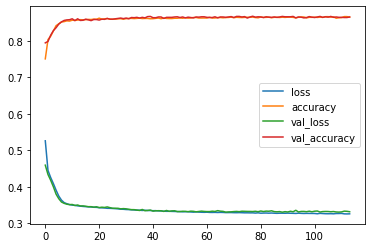

In [41]:
losses2.plot()

In [42]:
yestimated1=d2.predict(xtest)
yestimated1=(yestimated1>0.5)

63/63 [==============================] - 0s 1ms/step


In [43]:
yestimated1

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [44]:
cm1=confusion_matrix(ytest, yestimated) 
print('confusion matrix')
print(cm1)
print('\naccuracy=', accuracy_score(ytest,yestimated))
print('precision=', precision_score(ytest,yestimated))
print('recall=', recall_score(ytest, yestimated))

confusion matrix
[[1522   63]
 [ 211  204]]

accuracy= 0.863
precision= 0.7640449438202247
recall= 0.491566265060241
